# 1880년 부터 2014년 까지의 미국의 아기 이름을 정리해논 데이터셋

In [9]:
baby <- read.csv("../RFile/R_Baby_Names_1880-2014.csv", stringsAsFactors = F)
head(baby)

Name,Gender,Count,Year,Year.Rank
Mary,F,7065,01/01/1880 12:00:00 AM,1
Anna,F,2604,01/01/1880 12:00:00 AM,2
Emma,F,2003,01/01/1880 12:00:00 AM,3
Elizabeth,F,1939,01/01/1880 12:00:00 AM,4
Minnie,F,1746,01/01/1880 12:00:00 AM,5
Margaret,F,1578,01/01/1880 12:00:00 AM,6


In [10]:
tail(baby)

,Name,Gender,Count,Year,Year.Rank
1825383,Zyel,M,5,01/01/2014 12:00:00 AM,13972
1825384,Zykeem,M,5,01/01/2014 12:00:00 AM,13973
1825385,Zymeer,M,5,01/01/2014 12:00:00 AM,13974
1825386,Zymiere,M,5,01/01/2014 12:00:00 AM,13975
1825387,Zyran,M,5,01/01/2014 12:00:00 AM,13976
1825388,Zyrin,M,5,01/01/2014 12:00:00 AM,13977


In [11]:
sum(is.na(baby))

[1] 0

In [12]:
str(baby)

'data.frame':	1825388 obs. of  5 variables:
 $ Name     : chr  "Mary" "Anna" "Emma" "Elizabeth" ...
 $ Gender   : chr  "F" "F" "F" "F" ...
 $ Count    : int  7065 2604 2003 1939 1746 1578 1472 1414 1320 1288 ...
 $ Year     : chr  "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" ...
 $ Year.Rank: int  1 2 3 4 5 6 7 8 9 10 ...


In [13]:
summary(baby)

     Name              Gender              Count             Year          
 Length:1825388     Length:1825388     Min.   :    5.0   Length:1825388    
 Class :character   Class :character   1st Qu.:    7.0   Class :character  
 Mode  :character   Mode  :character   Median :   12.0   Mode  :character  
                                       Mean   :  184.7                     
                                       3rd Qu.:   32.0                     
                                       Max.   :99680.0                     
   Year.Rank    
 Min.   :    1  
 1st Qu.: 1790  
 Median : 4009  
 Mean   : 5301  
 3rd Qu.: 7820  
 Max.   :20548  

In [14]:
baby$Gender <- as.factor(baby$Gender)
str(baby)

'data.frame':	1825388 obs. of  5 variables:
 $ Name     : chr  "Mary" "Anna" "Emma" "Elizabeth" ...
 $ Gender   : Factor w/ 2 levels "F","M": 1 1 1 1 1 1 1 1 1 1 ...
 $ Count    : int  7065 2604 2003 1939 1746 1578 1472 1414 1320 1288 ...
 $ Year     : chr  "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" ...
 $ Year.Rank: int  1 2 3 4 5 6 7 8 9 10 ...


In [15]:
# baby의 Year부분 정리하기
library(stringr)

In [19]:
baby$Year <- str_sub(baby$Year,7,10)

In [16]:
baby$Year[1]

[1] "01/01/1880 12:00:00 AM"

In [20]:
head(baby)

Name,Gender,Count,Year,Year.Rank
Mary,F,7065,1880,1
Anna,F,2604,1880,2
Emma,F,2003,1880,3
Elizabeth,F,1939,1880,4
Minnie,F,1746,1880,5
Margaret,F,1578,1880,6


In [22]:
# 저장하기
write.csv(baby, "../RFile/baby.csv", row.names = F)

In [23]:
summary(baby)

     Name           Gender          Count             Year          
 Length:1825388     F:1081660   Min.   :    5.0   Length:1825388    
 Class :character   M: 743728   1st Qu.:    7.0   Class :character  
 Mode  :character               Median :   12.0   Mode  :character  
                                Mean   :  184.7                     
                                3rd Qu.:   32.0                     
                                Max.   :99680.0                     
   Year.Rank    
 Min.   :    1  
 1st Qu.: 1790  
 Median : 4009  
 Mean   : 5301  
 3rd Qu.: 7820  
 Max.   :20548  

In [24]:
# baby에서 여자 아이만 Female이라는 dataset를 만들고 row수 구하기
Female <- subset(baby, Gender == 'F')
nrow(Female)

[1] 1081660

In [28]:
# 여자 아이 이름중 중복 제거하고 갯수 구하기
length(unique(Female$Name))

[1] 64911

In [29]:
# 유일한 여자 아이 이름 20개만 출력하기
head(unique(Female$Name), 20)

[1] "Mary"      "Anna"      "Emma"      "Elizabeth" "Minnie"    "Margaret" 
 [7] "Ida"       "Alice"     "Bertha"    "Sarah"     "Annie"     "Clara"    
[13] "Ella"      "Florence"  "Cora"      "Martha"    "Laura"     "Nellie"   
[19] "Grace"     "Carrie"

---
### 가장 많이 사용된 여자아이 이름 10개 보여주기

In [31]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [39]:
Name_count <- aggregate(Count ~ Name,Female,sum)
Name_count <- arrange(Name_count,desc(Name_count$Count))
head(Name_count$Name,10)
nrow(Name_count)

[1] "Mary"      "Elizabeth" "Patricia"  "Jennifer"  "Linda"     "Barbara"  
 [7] "Margaret"  "Susan"     "Dorothy"   "Sarah"

[1] 64911

In [41]:
# baby에서 남자 아이만 Male이라는 데이터셋을 만들고 row수 구하기

Male <- subset(baby, Gender == 'M')
nrow(Male)

[1] 743728

In [63]:
년도별출생_Male <- aggregate(Count~Year,Male,sum)
년도별출생_Male[1:10,2]
nrow(년도별출생_Male)

[1] 110491 100745 113683 104629 114445 107800 110784 101414 120853 110584

[1] 135

In [61]:
년도별출생_Female <- aggregate(Count~Year,Female,sum)
년도별출생_Female[1:10,2]

[1]  90993  91954 107850 112321 129022 133055 144535 145982 178627 178366

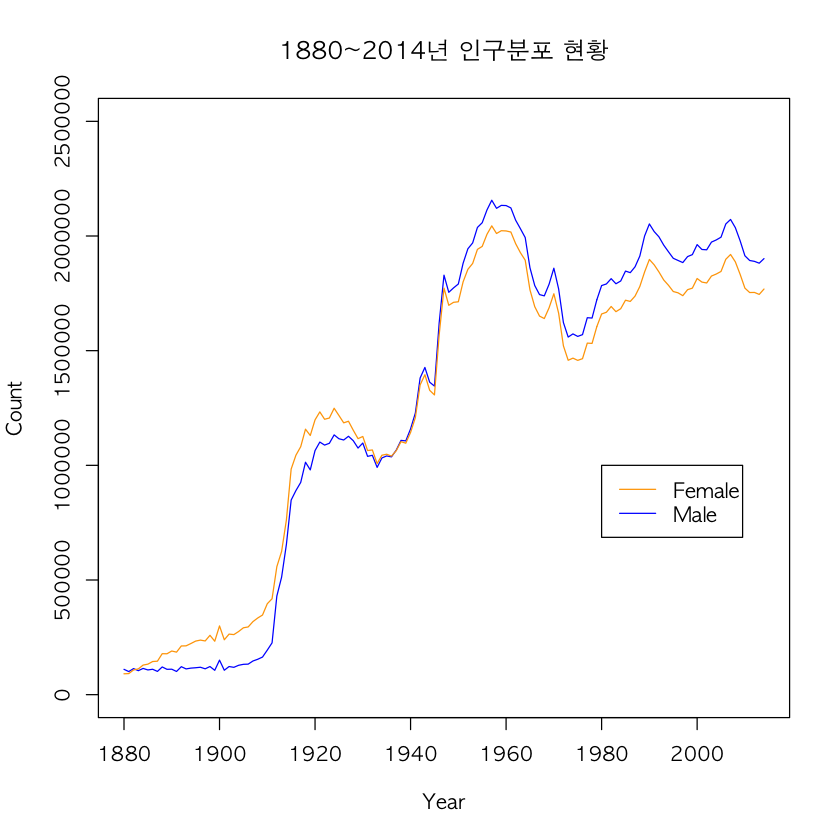

In [115]:
options(warn = -1)
par(family = 'AppleGothic')
plot(년도별출생_Male,
     type = "l",
     col ="blue",
     ylim = c(0, 2500000),

    )

# main title 지정
title(main="1880~2014년 인구분포 현황")

# 선그리기 함수로 def 그리기
lines(년도별출생_Female,
      type = "l",
      col = "orange",
      lty = 1
     )

# 범례
legend(1980, 1000000, # x,y 좌표
       c("Female", "Male"),
       col = c("orange", "blue"),
       lty = 1,
       cex = 1
      )